In [10]:
import pandas as pd
#raw = pd.pandas.read_csv('20170101_raw.csv',sep=";")
raw = pd.pandas.read_csv('20180608_raw_geo.csv',sep=",",low_memory=False)
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
from scipy import stats
print("imported " + str(len(raw)) + " rows")
#raw.columns.tolist()

imported 60503 rows


In [11]:
## var cleaning
input = ['living_area','rooms','floor','distance_ocean','rent','construction_year']
clean = raw
clean = clean[pd.notnull(raw[input]).all(axis=1)] #rowsum booleans for nullvals in col
#clean = raw[pd.notnull(raw['living_area']) & pd.notnull(raw['rooms']) & pd.notnull(raw['floor']) & pd.notnull(raw['sold_price']) & pd.notnull(raw['min_distance_to_metro'])]
print("Removed " +str(len(raw)-len(clean)) + " rows with nulls")

Removed 15681 rows with nulls


In [12]:
# additional features
sqm_price =  pd.DataFrame({'sqm_price':clean.sold_price / clean.living_area}) 
sqm_rent =  pd.DataFrame({'sqm_rent':clean.rent / clean.living_area}) 
clean = pd.concat([clean , sqm_price, sqm_rent], axis=1)

In [13]:
# remove outliers
num = len(clean)
before = num
important_vars = ['living_area','rooms','floor','sqm_price','distance_ocean','sqm_rent','construction_year']
for i in important_vars:
    q_u = clean[i].quantile(0.999)
    q_l = clean[i].quantile(0.005)
    clean = clean[clean[i] < q_u]
    clean = clean[clean[i] > q_l]
    print(str(q_l) + " < " + i + " < " + str(q_u) + ". " + str(num - len(clean)) + " removed.")
    num = len(clean)
print("bedore: " + str(before) + ", after: " + str(len(clean)))

19.5 < living_area < 222.0. 281 removed.
1.0 < rooms < 6.0. 7096 removed.
0.0 < floor < 18.556000000004133. 1267 removed.
30067.548746518107 < sqm_price < 142292.56410256444. 218 removed.
196.0 < distance_ocean < 7888.369000000042. 217 removed.
12.09865073529412 < sqm_rent < 89.86111111111111. 216 removed.
1879.0 < construction_year < 2017.0. 500 removed.
bedore: 44822, after: 35027


## Variable Plot

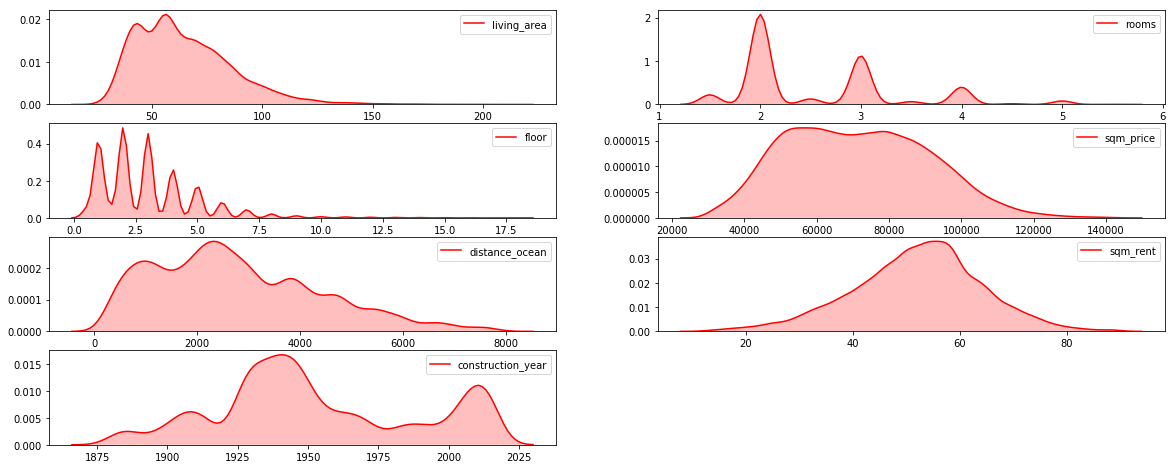

In [14]:
plot_vars = important_vars# ['living_area','rooms','floor','sqm_price','sqm_rent','distance_ocean','min_distance_to_metro']

plt.subplots(figsize=(20,8))
for i in range(1,len(plot_vars)+1):
    plt.subplot(math.ceil(len(plot_vars)/2),2,i)
    sns.kdeplot(clean[plot_vars[i-1]],shade=True, color="r", bw='scott')#bw=math.sqrt(len(clean[plot_vars[i-1]].unique()))/10)

plt.show()

## Bivariate Plot

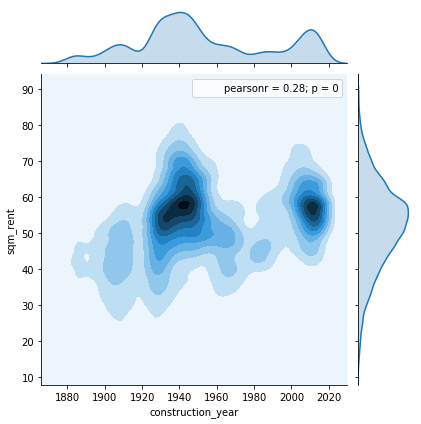

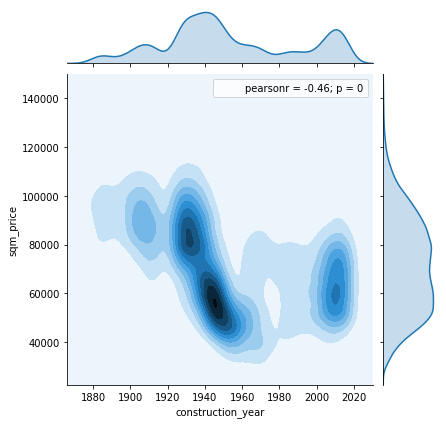

In [37]:
sns.jointplot(x="construction_year", y="sqm_rent", data=clean, kind="kde");
sns.jointplot(x="construction_year", y="sqm_price", data=clean, kind="kde");
#sns.regplot(x="construction_year", y="sqm_price", data=clean);
#sns.jointplot(x="sqm_rent", y="sqm_price", data=clean, kind="kde");
#sns.jointplot(x="min_distance_to_metro", y="sqm_price", data=clean, kind="kde");
plt.show()

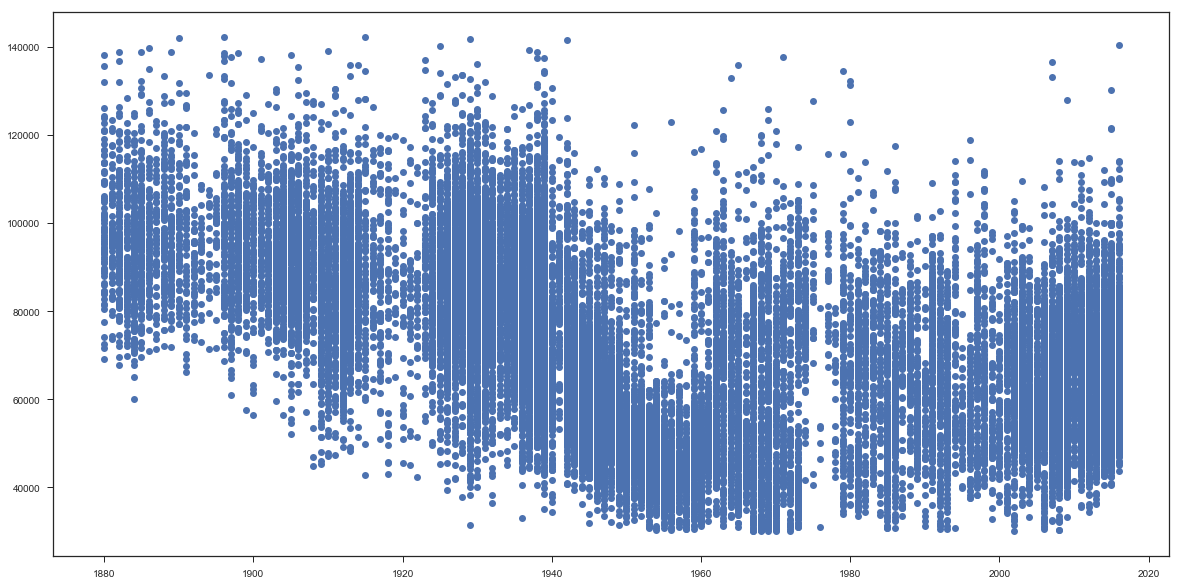

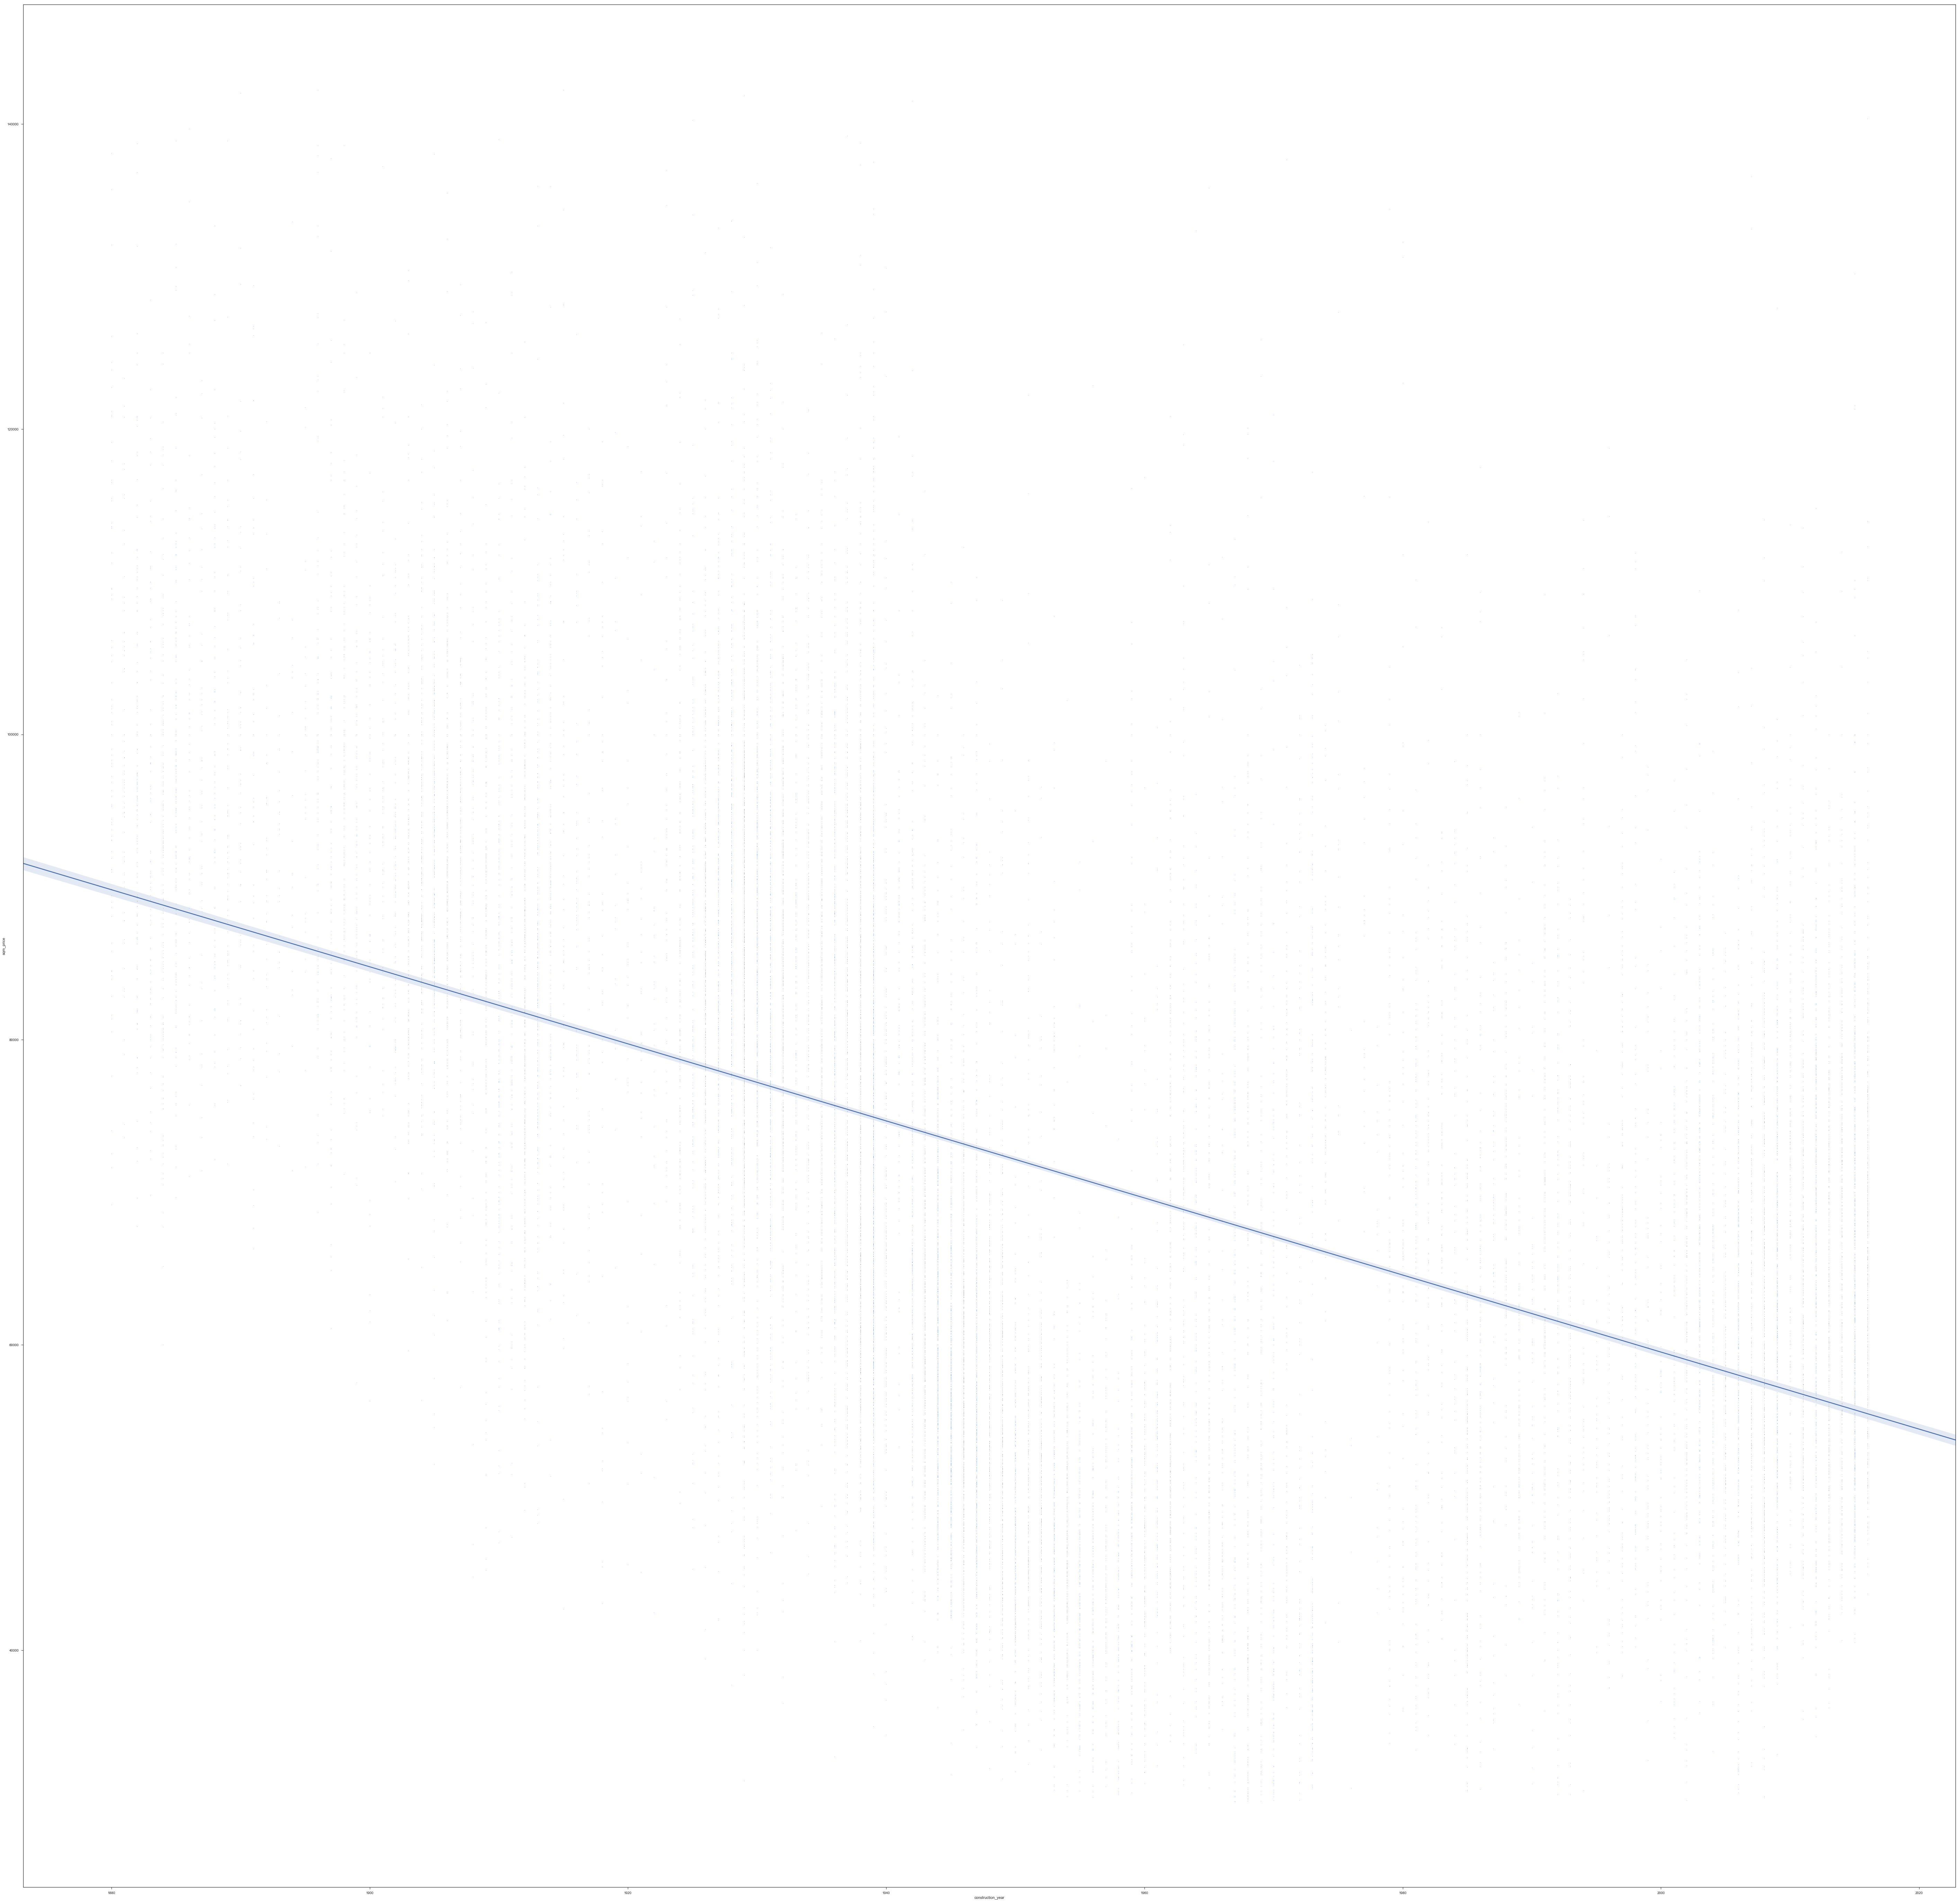

In [78]:
#sns.regplot(x="construction_year", y="sqm_price", data=clean, marker='o', markersize=0.7);
#construction_year_5 = np.floor(construction_year_5/10)*10
#construction_year_5_dict = pd.DataFrame({'living_area_round_10':living_area_round_10})
#df = pd.concat([raw , price,living_area_round_10_dict], axis=1)



plt.subplots(figsize=(20,10))
plt.plot("construction_year","sqm_price", data=clean,linestyle='', marker='o', markersize=7);
plt.show()
sns.set(style="ticks")
sns.set
sns.regplot(x="construction_year", y="sqm_price", data=clean, marker='o', scatter_kws={"s": 1});




0        1914.0
1        1961.0
3        1943.0
4        1963.0
5        1943.0
6        1943.0
8        1884.0
10       1928.0
11       1926.0
12       1896.0
13       1943.0
14       1942.0
16       1933.0
17       1944.0
18       2009.0
20       1977.0
23       1949.0
24       1947.0
27       1901.0
29       1931.0
30       1928.0
31       1919.0
32       1925.0
34       1953.0
37       1934.0
38       1884.0
39       1939.0
41       1947.0
42       2015.0
43       1945.0
          ...  
60439    1946.0
60440    2013.0
60443    1942.0
60444    1938.0
60446    2013.0
60447    1932.0
60451    1980.0
60452    1931.0
60453    1945.0
60457    1943.0
60460    1985.0
60464    1971.0
60465    2002.0
60467    1946.0
60468    1930.0
60469    1989.0
60471    1943.0
60472    1946.0
60476    1945.0
60478    1942.0
60479    1944.0
60480    1925.0
60482    1944.0
60489    1992.0
60490    1936.0
60497    1946.0
60498    1886.0
60499    1914.0
60500    1931.0
60502    1931.0
Name: construction_year,

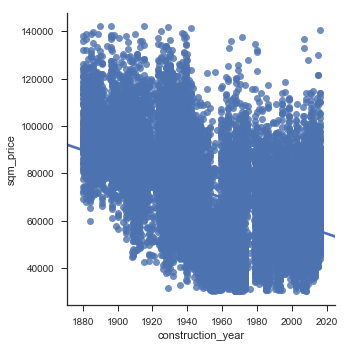

In [79]:
sns.set_style('ticks')
sns.lmplot(x="construction_year", y="sqm_price", data=clean);
clean.construction_year
